In [2]:
#Import the libraries
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib
sns.set_style("darkgrid")

# Cores 

To compute the core the get_homologues software is required https://github.com/eead-csic-compbio/get_homologues

In [3]:
%%bash
perl /home/val/src/get_homologues/parse_pangenome_matrix.pl -h


[options]: 
-h 	 this message
-m 	 input pangenome matrix .tab                               (required, made by compare_clusters.pl)
-s 	 report cloud,shell,soft core and core clusters            (optional, creates plot if R is installed)
-l 	 list taxa names present in clusters reported in -m matrix (optional, recommended before using -p option)
-x 	 produce matrix of intersection pangenome clusters         (optional, requires -s)
-I 	 use only taxon names included in file                     (optional, ignores -A,-g,-e)
-A 	 file with taxon names (.faa,.gbk,.nucl files) of group A  (optional, example -A clade_list_pathogenic.txt)
-B 	 file with taxon names (.faa,.gbk,.nucl files) of group B  (optional, example -B clade_list_symbiotic.txt)
-a 	 find genes/clusters which are absent in B                 (optional, requires -B)
-g 	 find genes/clusters present in A which are absent in B    (optional, requires -A & -B)
-e 	 find gene family expansions in A with respect to B        (optio

# Run pangenome 

Matrix with genus taxonomic assignment from 12 metagenomic samples 

#### Example of input matrix 

In [3]:
genus=pd.read_table("../data/genusN0.tr.tsv")
genus.head()

,non-redundant,Actinobacteria unclassified_class_1760,Actinobacteria unclassified_phylum_201174,Gemmatimonadetes unclassified_class_219685,Thermotogae unclassified_class_188708,Thermotogae unclassified_phylum_200918,Acaryochloris,Acetobacter,Acetobacteraceae unclassified,Acetobacterium,...,Xanthomonadales unclassified,Xanthomonas,Xenococcus,Xenophilus,Xenorhabdus,Xylophilus,Yersinia,Yonghaparkia,Zavarzinella,Zetaproteobacteria unclassified
0,S1,648,53,0,0,0,1,5,35,0,...,23,30,0,0,0,0,1,3,16,0
1,S2,148,11,0,2,0,0,0,6,0,...,7,8,0,0,0,0,0,1,0,0
2,S3,612,37,0,3,0,2,5,34,0,...,32,32,7,0,0,0,1,1,0,0
3,S4,927,88,0,0,0,5,13,43,0,...,60,41,0,10,2,6,2,3,14,0
4,S5,669,62,0,0,0,4,7,34,0,...,33,38,0,3,0,0,0,3,11,1


In [5]:
%%bash
perl /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -s 


# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -I  -A  -B  -a 0 -g 0 -e 0 -p  -s 1 -l 0 -x 0 -P 100 -S 0

# matrix contains 1431 clusters and 12 taxa

# cloud size: 342 list: ../data/genusN0.tr.tsv__cloud_list.txt
# shell size: 584 list: ../data/genusN0.tr.tsv__shell_list.txt
# soft core size: 505 list: ../data/genusN0.tr.tsv__softcore_list.txt
# core size: 373 (included in soft core) list: ../data/genusN0.tr.tsv__core_list.txt

# using default colors, defined in %COLORS

# globals controlling R plots: $YLIMRATIO=1.2

# shell bar plots: ../data/genusN0.tr.tsv__shell.png , ../data/genusN0.tr.tsv__shell.pdf
# shell circle plots: ../data/genusN0.tr.tsv__shell_circle.png , ../data/genusN0.tr.tsv__shell_circle.pdf

# pan-genome size estimates (Snipen mixture model PMID:19691844): ../data/genusN0.tr.tsv__shell_estimates.tab
Core.size Pan.size BIC LogLikelihood
2 components 373 1432 9402.56093133229 -4690.38127249681
3 components 359 1481 6830.59046521229 

### Core genera

#### Check the directory ../data/core_mats to see the output from get_homologues

In [8]:
%%bash
less -S ../data/core_mats/genusN0.tr.tsv__core_list.txt | sort | head

Acetobacteraceae unclassified
Achromobacter
Acidiphilium
Acidithiobacillales unclassified
Acidobacteria unclassified
Acidocella
Acidovorax
Acinetobacter
Actinobacteria unclassified_class_1760
Actinobacteria unclassified_phylum_201174


# Create occupancy file to plot

In [9]:
occupancy=pd.read_table("../core_mats/genusN0.tr.tsv__occupancy_stats.txt", index_col=0)
occupancy=occupancy.T
occupancy.T

,Site,Time,cloud,shell,soft_core
Sample_Id,,,,,
S1,a,Autumn 12,23,265,502
S2,b,Autumn 12,35,300,498
S3,c,Autumn 12,37,246,490
S4,a,Spring 13,59,330,503
S5,b,Spring 13,21,152,421
S6,c,Spring 13,46,361,501
S7,a,Autumn 13,58,344,501
S8,b,Autumn 13,39,342,504
S9,c,Autumn 13,26,262,499


In [10]:
sitea=occupancy[['S1', 'S4', 'S7', 'S10']]
siteb=occupancy[['S2', 'S5', 'S8', 'S11']]
sitec=occupancy[['S3', 'S6', 'S9', 'S12']]
sitea.columns=['Autumn 12','Spring 13','Autumn 13','Spring 14']
siteb.columns=['Autumn 12','Spring 13','Autumn 13','Spring 14']
sitec.columns=['Autumn 12','Spring 13','Autumn 13','Spring 14']

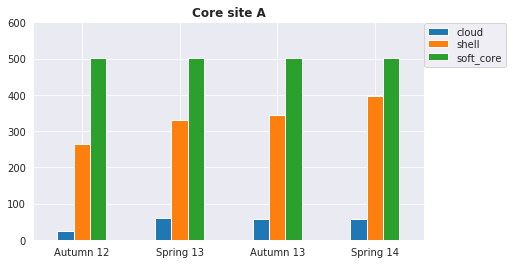

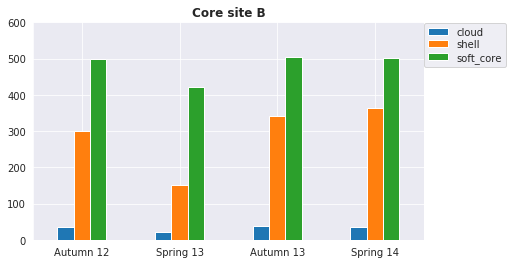

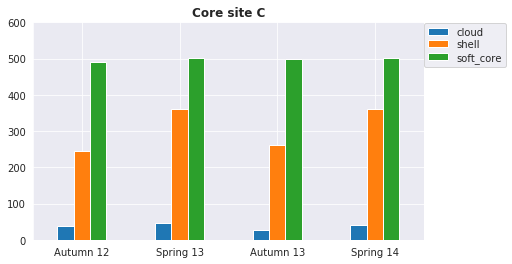

In [11]:
from numpy import median
ax=sitea.T.plot(kind='bar',figsize=(7,4))
plt.ylab=("Number of species")
plt.title("Core site A", weight="bold", size="large")
plt.xticks(rotation = 360)
plt.ylim(0,600)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.05 ,labelspacing=0.25)

ax=siteb.T.plot(kind='bar',figsize=(7,4))
plt.xlab=("Number of species")
plt.title("Core site B", weight="bold", size="large")
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.05 ,labelspacing=0.25)
plt.xticks(rotation = 360)
plt.ylim(0,600)

ax=sitec.T.plot(kind='bar',figsize=(7,4))
plt.xlab=("Number of species")
plt.title("Core site C", weight="bold", size="large")
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.05 ,labelspacing=0.25)
plt.xticks(rotation = 360)
plt.ylim(0,600)
plt.savefig("../figures/Mats_core.png")

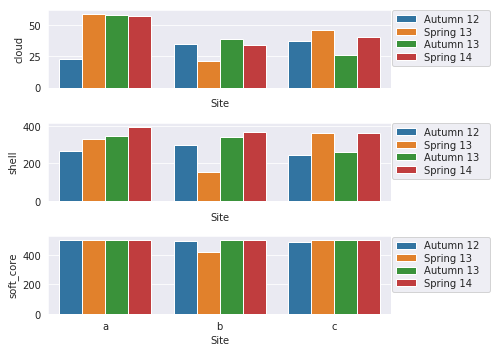

In [12]:
from numpy import median

X = 7
Y = 5
fig = plt.figure(figsize=(X, Y))
plt.subplot(311)

ax = sns.barplot(x="Site", y="cloud", hue="Time", data=occupancy.T)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.05 ,labelspacing=0.25)
ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.tight_layout()

plt.subplot(312)
ax = sns.barplot(x="Site", y="shell", hue="Time", data=occupancy.T)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.05 ,labelspacing=0.25)
ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.tight_layout()

plt.subplot(313)
ax = sns.barplot(x="Site", y="soft_core", hue="Time", data=occupancy.T)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.05 ,labelspacing=0.25)
plt.tight_layout()
#plt.savefig("../6_Figures/Core_bysite.png", dpi=500,bbox_inches='tight')


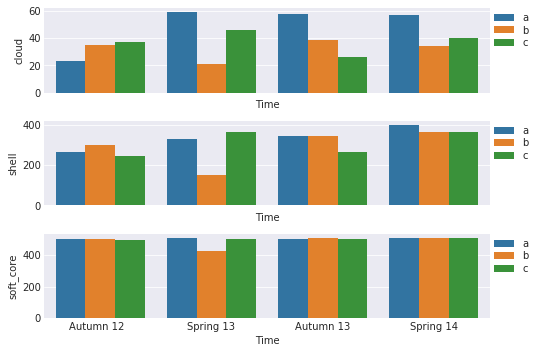

In [12]:
from numpy import median

X = 7
Y = 5
fig = plt.figure(figsize=(X, Y))
plt.subplot(311)

ax = sns.barplot(x="Time", y="cloud", hue="Site", data=occupancy.T)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.05 ,labelspacing=0.25)
ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.tight_layout()

plt.subplot(312)
ax = sns.barplot(x="Time", y="shell", hue="Site", data=occupancy.T)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.05 ,labelspacing=0.25)
ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.tight_layout()

plt.subplot(313)
ax = sns.barplot(x="Time", y="soft_core", hue="Site", data=occupancy.T)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.05 ,labelspacing=0.25)
plt.tight_layout()
#plt.savefig("Core_bysite.png", dpi=500,bbox_inches='tight')


# Variance

In [13]:
print("Var Cloud A:\t", sitea.T.cloud.var()) 
print("Var Shell A:\t",sitea.T.shell.var())
print("Var soft_core:\t",sitea.T.soft_core.var())
print ("=====================")
print("Var Cloud B:\t", siteb.T.cloud.var()) 
print("Var Shell B:\t",siteb.T.shell.var())
print("Var soft_core B:\t",siteb.T.soft_core.var())
print ("=====================")
print("Var Cloud C:\t", sitec.T.cloud.var()) 
print("Var Shell C:\t",sitec.T.shell.var())
print("Var soft_core C:\t",sitec.T.soft_core.var())

Var Cloud A:	 306.9166666666667
Var Shell A:	 2906.9166666666665
Var soft_core:	 0.9166666666666666
Var Cloud B:	 60.916666666666664
Var Shell B:	 9157.583333333334
Var soft_core B:	 1633.6666666666667
Var Cloud C:	 70.25
Var Shell C:	 3894.9166666666665
Var soft_core C:	 32.916666666666664


# Site Comparision 

#### 1. *Generate files containing the identifiers of each sample*

In [14]:
%%bash 
head ../data/Site*.txt

==> ../data/SiteA.txt <==
S1
S4
S7
S10

==> ../data/SiteB.txt <==
S2
S5
S8
S11

==> ../data/SiteC.txt <==
S3
S6
S9
S12


#### 2. *Using parse_pangenome_matrix.pl script using the same file tsrv*:

### A vs B (present in A absent in B)

In [17]:
%%bash
perl /home/val/src/get_homologues/parse_pangenome_matrix.pl \
-m ../data/genusN0.tr.tsv -g -A ../data/SiteA.txt -B ../data/SiteB.txt  \
&&  less  ../data/genusN0.tr.tsv__pangenes_list.txt


# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -I  -A ../data/SiteA.txt -B ../data/SiteB.txt -a 0 -g 1 -e 0 -p  -s 0 -l 0 -x 0 -P 100 -S 0

# matrix contains 1431 clusters and 12 taxa

# taxa included in group A = 4

# taxa included in group B = 4


# finding genes present in A which are absent in B ...
# file with genes present in set A and absent in B (3): ../data/genusN0.tr.tsv__pangenes_list.txt
# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -A ../data/SiteA.txt -B ../data/SiteB.txt -g 1 -e 0 -p  -P 100 -S 0
# genes present in set A and absent in B (3):
Anabaena
Aromatoleum
Phormidium


### B vs A (present in B absent in A)

In [19]:
%%bash
perl /home/val/src/get_homologues/parse_pangenome_matrix.pl \
-m ../data/genusN0.tr.tsv -g -A ../data/SiteB.txt -B ../data/SiteA.txt  \
&&  less  ../data/genusN0.tr.tsv__pangenes_list.txt


# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -I  -A ../data/SiteB.txt -B ../data/SiteA.txt -a 0 -g 1 -e 0 -p  -s 0 -l 0 -x 0 -P 100 -S 0

# matrix contains 1431 clusters and 12 taxa

# taxa included in group A = 4

# taxa included in group B = 4


# finding genes present in A which are absent in B ...
# file with genes present in set A and absent in B (2): ../data/genusN0.tr.tsv__pangenes_list.txt
# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -A ../data/SiteB.txt -B ../data/SiteA.txt -g 1 -e 0 -p  -P 100 -S 0
# genes present in set A and absent in B (2):
Marinilabilia
Thermincola


### A vs C (present in A absent in C)

In [20]:
%%bash
perl /home/val/src/get_homologues/parse_pangenome_matrix.pl \
-m ../data/genusN0.tr.tsv -g -A ../data/SiteA.txt  \
-B ../data/SiteC.txt \
&&  less  ../data/genusN0.tr.tsv__pangenes_list.txt


# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -I  -A ../data/SiteA.txt -B ../data/SiteC.txt -a 0 -g 1 -e 0 -p  -s 0 -l 0 -x 0 -P 100 -S 0

# matrix contains 1431 clusters and 12 taxa

# taxa included in group A = 4

# taxa included in group B = 4


# finding genes present in A which are absent in B ...
# file with genes present in set A and absent in B (1): ../data/genusN0.tr.tsv__pangenes_list.txt
# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -A ../data/SiteA.txt -B ../data/SiteC.txt -g 1 -e 0 -p  -P 100 -S 0
# genes present in set A and absent in B (1):
Rhodothermus


### C vs A (present in C absent in A)

In [32]:
%%bash 
perl /home/val/src/get_homologues/parse_pangenome_matrix.pl \
-m ../data/genusN0.tr.tsv -g -A ../data/SiteC.txt -B ../data/SiteA.txt  && \
head ../data/genusN0.tr.tsv__pangenes_list.txt


# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -I  -A ../data/SiteC.txt -B ../data/SiteA.txt -a 0 -g 1 -e 0 -p  -s 0 -l 0 -x 0 -P 100 -S 0

# matrix contains 1431 clusters and 12 taxa

# taxa included in group A = 4

# taxa included in group B = 4


# finding genes present in A which are absent in B ...
# file with genes present in set A and absent in B (2): ../data/genusN0.tr.tsv__pangenes_list.txt
# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -A ../data/SiteC.txt -B ../data/SiteA.txt -g 1 -e 0 -p  -P 100 -S 0
# genes present in set A and absent in B (2):
Delta/epsilon subdivisions unclassified
Methanomicrobia unclassified


### B vs C (present in B absent in C)

In [26]:
%%bash
perl /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -g \
-A ../data/SiteB.txt -B ../data/SiteC.txt \
&&  head  ../data/genusN0.tr.tsv__pangenes_list.txt


# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -I  -A ../data/SiteB.txt -B ../data/SiteC.txt -a 0 -g 1 -e 0 -p  -s 0 -l 0 -x 0 -P 100 -S 0

# matrix contains 1431 clusters and 12 taxa

# taxa included in group A = 4

# taxa included in group B = 4


# finding genes present in A which are absent in B ...
# file with genes present in set A and absent in B (0): ../data/genusN0.tr.tsv__pangenes_list.txt
# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -A ../data/SiteB.txt -B ../data/SiteC.txt -g 1 -e 0 -p  -P 100 -S 0
# genes present in set A and absent in B (0):


### C vs B (present in C absent in B)

In [29]:
%%bash
perl /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -g \
-A ../data/SiteC.txt -B ../data/SiteB.txt && head ../data/genusN0.tr.tsv__pangenes_list.txt


# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -I  -A ../data/SiteC.txt -B ../data/SiteB.txt -a 0 -g 1 -e 0 -p  -s 0 -l 0 -x 0 -P 100 -S 0

# matrix contains 1431 clusters and 12 taxa

# taxa included in group A = 4

# taxa included in group B = 4


# finding genes present in A which are absent in B ...
# file with genes present in set A and absent in B (1): ../data/genusN0.tr.tsv__pangenes_list.txt
# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -A ../data/SiteC.txt -B ../data/SiteB.txt -g 1 -e 0 -p  -P 100 -S 0
# genes present in set A and absent in B (1):
Glycomyces


### Dry and humid conditios by site 

# Site A

In [34]:
%%bash
perl /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -g \
-A ../data/S1.txt -B ../data/S4_7_10.txt  &&  head  ../data/genusN0.tr.tsv__pangenes_list.txt


# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -I  -A ../data/S1.txt -B ../data/S4_7_10.txt -a 0 -g 1 -e 0 -p  -s 0 -l 0 -x 0 -P 100 -S 0

# matrix contains 1431 clusters and 12 taxa

# taxa included in group A = 1

# taxa included in group B = 3


# finding genes present in A which are absent in B ...
# file with genes present in set A and absent in B (44): ../data/genusN0.tr.tsv__pangenes_list.txt
# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -A ../data/S1.txt -B ../data/S4_7_10.txt -g 1 -e 0 -p  -P 100 -S 0
# genes present in set A and absent in B (44):
Acidaminococcus
Acidimicrobiia unclassified
Aggregatibacter
Alishewanella
Blastococcus
Borreliella
Candidatus Blochmannia
Candidatus Protochlamydia


In [36]:
%%bash
perl /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -g \
-A ../data/S4_7_10.txt -B ../data/S1.txt    &&  head  ../data/genusN0.tr.tsv__pangenes_list.txt


# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -I  -A ../data/S4_7_10.txt -B ../data/S1.txt -a 0 -g 1 -e 0 -p  -s 0 -l 0 -x 0 -P 100 -S 0

# matrix contains 1431 clusters and 12 taxa

# taxa included in group A = 3

# taxa included in group B = 1


# finding genes present in A which are absent in B ...
# file with genes present in set A and absent in B (82): ../data/genusN0.tr.tsv__pangenes_list.txt
# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -A ../data/S4_7_10.txt -B ../data/S1.txt -g 1 -e 0 -p  -P 100 -S 0
# genes present in set A and absent in B (82):
Acidomonas
Aeromonadaceae unclassified
Agrococcus
Anaerolinea
Aquincola
Azonexus
Blastomonas
Candidatus Azambacteria unclassified


# Site B 

In [37]:
%%bash 
perl /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -g \
-A ../data/S2.txt -B ../data/S5_8_11.txt   &&  head  ../data/genusN0.tr.tsv__pangenes_list.txt


# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -I  -A ../data/S2.txt -B ../data/S5_8_11.txt -a 0 -g 1 -e 0 -p  -s 0 -l 0 -x 0 -P 100 -S 0

# matrix contains 1431 clusters and 12 taxa

# taxa included in group A = 1

# taxa included in group B = 3


# finding genes present in A which are absent in B ...
# file with genes present in set A and absent in B (30): ../data/genusN0.tr.tsv__pangenes_list.txt
# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -A ../data/S2.txt -B ../data/S5_8_11.txt -g 1 -e 0 -p  -P 100 -S 0
# genes present in set A and absent in B (30):
Ascomycota unclassified
Borreliella
Candidatus Protochlamydia
Carnobacteriaceae unclassified
Dysgonomonas
Ehrlichia
Eubacterium
Fervidobacterium


In [38]:
%%bash 
perl /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -g \
-A ../data/S5_8_11.txt -B ../data/S2.txt   &&  head  ../data/genusN0.tr.tsv__pangenes_list.txt


# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -I  -A ../data/S5_8_11.txt -B ../data/S2.txt -a 0 -g 1 -e 0 -p  -s 0 -l 0 -x 0 -P 100 -S 0

# matrix contains 1431 clusters and 12 taxa

# taxa included in group A = 3

# taxa included in group B = 1


# finding genes present in A which are absent in B ...
# file with genes present in set A and absent in B (158): ../data/genusN0.tr.tsv__pangenes_list.txt
# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -A ../data/S5_8_11.txt -B ../data/S2.txt -g 1 -e 0 -p  -P 100 -S 0
# genes present in set A and absent in B (158):
Acetobacter
Acidimicrobiia unclassified
Acidobacteriaceae unclassified
Actinomadura
Actinomycetaceae unclassified
Alcaligenes
Alicycliphilus
Alicyclobacillus


# Site C 

In [40]:
%%bash 
perl /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -g \
-A ../data/S3.txt -B ../data/S6_9_12.txt   &&  head  ../data/genusN0.tr.tsv__pangenes_list.txt


# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -I  -A ../data/S3.txt -B ../data/S6_9_12.txt -a 0 -g 1 -e 0 -p  -s 0 -l 0 -x 0 -P 100 -S 0

# matrix contains 1431 clusters and 12 taxa

# taxa included in group A = 1

# taxa included in group B = 3


# finding genes present in A which are absent in B ...
# file with genes present in set A and absent in B (94): ../data/genusN0.tr.tsv__pangenes_list.txt
# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -A ../data/S3.txt -B ../data/S6_9_12.txt -g 1 -e 0 -p  -P 100 -S 0
# genes present in set A and absent in B (94):
Aliiroseovarius
Altererythrobacter
Aminobacterium
Aquificaceae unclassified
Azonexus
Bacteriovorax
Balneola
Belliella


In [41]:
%%bash 
perl /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -g \
-A ../data/S6_9_12.txt -B ../data/S3.txt  &&  head  ../data/genusN0.tr.tsv__pangenes_list.txt


# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -I  -A ../data/S6_9_12.txt -B ../data/S3.txt -a 0 -g 1 -e 0 -p  -s 0 -l 0 -x 0 -P 100 -S 0

# matrix contains 1431 clusters and 12 taxa

# taxa included in group A = 3

# taxa included in group B = 1


# finding genes present in A which are absent in B ...
# file with genes present in set A and absent in B (51): ../data/genusN0.tr.tsv__pangenes_list.txt
# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -A ../data/S6_9_12.txt -B ../data/S3.txt -g 1 -e 0 -p  -P 100 -S 0
# genes present in set A and absent in B (51):
Anaerolinea
Anoxybacillus
Archangium
Ardenticatena
Bellilinea
Blastopirellula
Brachyspira
Caldilinea


# Dry vs humid (a b and c )

In [44]:
%%bash 
perl /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -g \
-A ../data/dry.txt -B ../data/humid.txt 


# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -I  -A ../data/dry.txt -B ../data/humid.txt -a 0 -g 1 -e 0 -p  -s 0 -l 0 -x 0 -P 100 -S 0

# matrix contains 1431 clusters and 12 taxa

# taxa included in group A = 3

# taxa included in group B = 9


# finding genes present in A which are absent in B ...
# file with genes present in set A and absent in B (0): ../data/genusN0.tr.tsv__pangenes_list.txt


In [46]:
%%bash 
perl /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -g \
-A ../data/humid.txt -B ../data/dry.txt  && head ../data/core_mats/genusN0.tr.tsv__pangenes_list.txt  


# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -I  -A ../data/humid.txt -B ../data/dry.txt -a 0 -g 1 -e 0 -p  -s 0 -l 0 -x 0 -P 100 -S 0

# matrix contains 1431 clusters and 12 taxa

# taxa included in group A = 9

# taxa included in group B = 3


# finding genes present in A which are absent in B ...
# file with genes present in set A and absent in B (2): ../data/genusN0.tr.tsv__pangenes_list.txt
# /home/val/src/get_homologues/parse_pangenome_matrix.pl -m ../data/genusN0.tr.tsv -A ../data/humid.txt -B ../data/dry.txt -g 1 -e 0 -p  -P 100 -S 0
# genes present in set A and absent in B (2):
Ornatilinea
Rikenellaceae unclassified
